In [11]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Налаштування візуалізацій
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# Завантажуємо дані з попереднього етапу (з ознакою аномалій)
data_path = '../data/household_power_consumption_hourly_with_anomalies.csv'
df = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)

print("Дані успішно завантажено. Розмір:", df.shape)
df.head()

Дані успішно завантажено. Розмір: (34560, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly
DateTime,,,,,,,,
2006-12-17 10:00:00,166.352,10.264,234.446486,19.275676,533.0,1341.0,623.0,0
2006-12-17 11:00:00,105.120,6.248,235.731622,12.140541,567.0,296.0,630.0,0
2006-12-17 12:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0
2006-12-17 13:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0
2006-12-17 14:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0


In [12]:
# Визначаємо точку розділення
split_fraction = 0.8
split_point = int(len(df) * split_fraction)

# Розділяємо датасет
train_df = df.iloc[:split_point].copy()
test_df = df.iloc[split_point:].copy()

print(f"Розмір тренувального набору: {train_df.shape}")
print(f"Розмір тестового набору: {test_df.shape}")

Розмір тренувального набору: (27648, 8)
Розмір тестового набору: (6912, 8)


Перші 5 рядків стандартизованого тренувального набору:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly
DateTime,,,,,,,,
2006-12-17 10:00:00,3.821741,3.037496,-1.293621,1.551887,2.140240,10.846029,2.847280,-0.107352
2006-12-17 11:00:00,2.292848,1.733020,-0.888860,0.106544,2.297186,2.289045,2.882541,-0.107352
2006-12-17 12:00:00,-0.331878,-0.296455,NaN,NaN,-0.320109,-0.134752,-0.290971,-0.107352
2006-12-17 13:00:00,-0.331878,-0.296455,NaN,NaN,-0.320109,-0.134752,-0.290971,-0.107352
2006-12-17 14:00:00,-0.331878,-0.296455,NaN,NaN,-0.320109,-0.134752,-0.290971,-0.107352



Розподіл 'Global_active_power' до та після стандартизації:


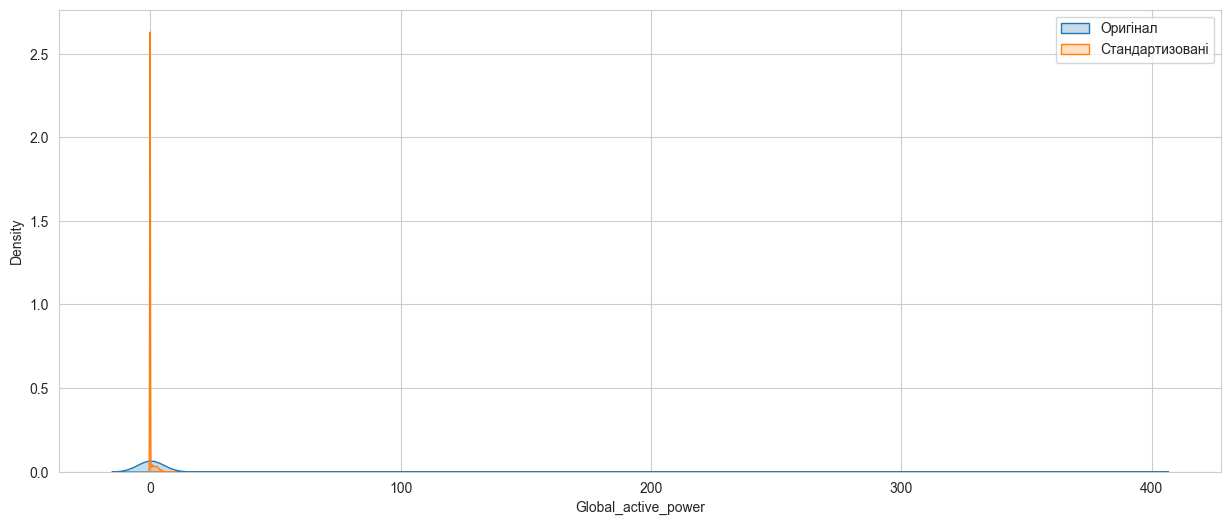

In [13]:
# Створюємо екземпляр StandardScaler
scaler_standard = StandardScaler()

# Навчаємо скейлер ТІЛЬКИ на тренувальних даних
scaler_standard.fit(train_df)

# Трансформуємо і тренувальний, і тестовий набори
train_scaled_standard = scaler_standard.transform(train_df)
test_scaled_standard = scaler_standard.transform(test_df)

# Перетворюємо результат назад у DataFrame для зручності
train_df_scaled_standard = pd.DataFrame(train_scaled_standard, index=train_df.index, columns=train_df.columns)
test_df_scaled_standard = pd.DataFrame(test_scaled_standard, index=test_df.index, columns=test_df.columns)

print("Перші 5 рядків стандартизованого тренувального набору:")
display(train_df_scaled_standard.head())

# Візуалізація для перевірки
print("\nРозподіл 'Global_active_power' до та після стандартизації:")
sns.kdeplot(train_df['Global_active_power'], label='Оригінал', fill=True)
sns.kdeplot(train_df_scaled_standard['Global_active_power'], label='Стандартизовані', fill=True)
plt.legend()
plt.show()

Перші 5 рядків нормалізованого тренувального набору:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly
DateTime,,,,,,,,
2006-12-17 10:00:00,0.425259,0.220921,0.314754,0.509080,0.183666,0.577022,0.528862,0.0
2006-12-17 11:00:00,0.268727,0.134481,0.373883,0.312478,0.195382,0.127367,0.534805,0.0
2006-12-17 12:00:00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0
2006-12-17 13:00:00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0
2006-12-17 14:00:00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0



Розподіл 'Global_active_power' до та після нормалізації:


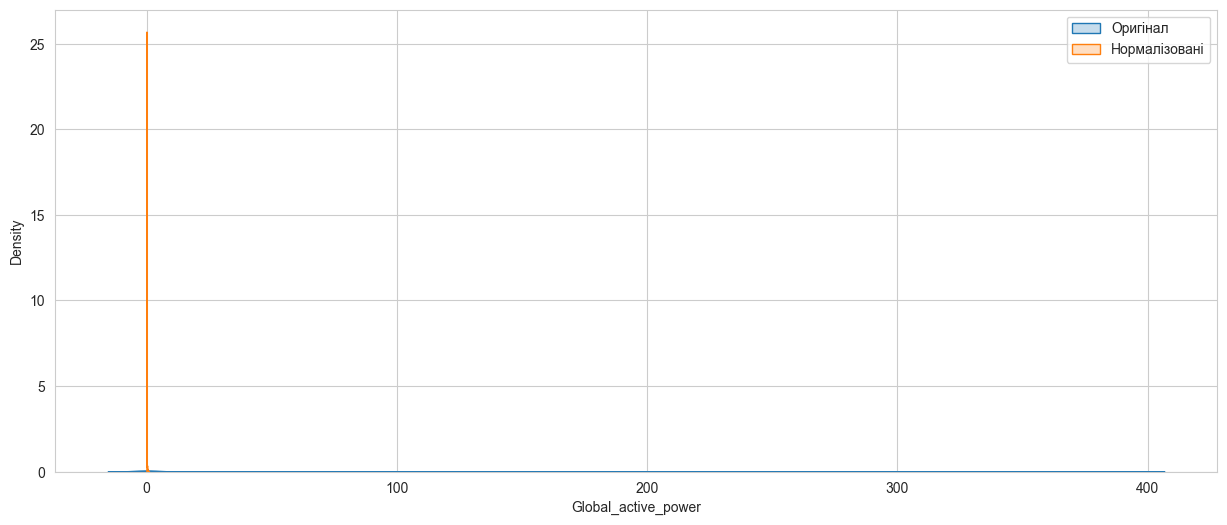

In [14]:
# Створюємо екземпляр MinMaxScaler
scaler_minmax = MinMaxScaler()

# Навчаємо скейлер ТІЛЬКИ на тренувальних даних
scaler_minmax.fit(train_df)

# Трансформуємо і тренувальний, і тестовий набори
train_scaled_minmax = scaler_minmax.transform(train_df)
test_scaled_minmax = scaler_minmax.transform(test_df)

# Перетворюємо результат назад у DataFrame
train_df_scaled_minmax = pd.DataFrame(train_scaled_minmax, index=train_df.index, columns=train_df.columns)
test_df_scaled_minmax = pd.DataFrame(test_scaled_minmax, index=test_df.index, columns=test_df.columns)

print("Перші 5 рядків нормалізованого тренувального набору:")
display(train_df_scaled_minmax.head())

# Візуалізація для перевірки
print("\nРозподіл 'Global_active_power' до та після нормалізації:")
sns.kdeplot(train_df['Global_active_power'], label='Оригінал', fill=True)
sns.kdeplot(train_df_scaled_minmax['Global_active_power'], label='Нормалізовані', fill=True)
plt.legend()
plt.show()

In [15]:
# --- ОНОВЛЕНА ВЕРСІЯ ---
from pathlib import Path
import joblib

# 1. Визначаємо шлях до кореневої папки проєкту
# Path.cwd() - це поточна папка, а .parent - це батьківська папка.
# Оскільки ноутбук лежить в 'notebooks', то його 'parent' - це корінь проєкту.
project_root = Path.cwd().parent
print(f"Коренева папка проєкту: {project_root}")

# 2. Створюємо абсолютні шляхи до папок 'models' та 'data'
models_dir = project_root / 'models'
data_dir = project_root / 'data'

# 3. Створюємо папку 'models', якщо її не існує.
# exist_ok=True гарантує, що не буде помилки, якщо папка вже є.
models_dir.mkdir(exist_ok=True)
print(f"Перевірено/створено директорію: {models_dir}")


# 4. Зберігаємо скейлери, використовуючи новий, надійний шлях
joblib.dump(scaler_standard, models_dir / 'standard_scaler.pkl')
joblib.dump(scaler_minmax, models_dir / 'minmax_scaler.pkl')
print("✅ Скейлери успішно збережено в папку 'models'.")


# 5. Зберігаємо оброблені дані, використовуючи новий шлях
train_df_scaled_standard.to_csv(data_dir / 'train_standard_scaled.csv')
test_df_scaled_standard.to_csv(data_dir / 'test_standard_scaled.csv')

train_df_scaled_minmax.to_csv(data_dir / 'train_minmax_scaled.csv')
test_df_scaled_minmax.to_csv(data_dir / 'test_minmax_scaled.csv')

print("✅ Масштабовані дані збережено в папку 'data'.")

Коренева папка проєкту: /Users/kolya/PycharmProjects/energy_forecast_api
Перевірено/створено директорію: /Users/kolya/PycharmProjects/energy_forecast_api/models
✅ Скейлери успішно збережено в папку 'models'.
✅ Масштабовані дані збережено в папку 'data'.


In [16]:
import joblib
from pathlib import Path
import pandas as pd

# Визначаємо шлях до папки з моделями
project_root = Path.cwd().parent
models_dir = project_root / 'models'

# Завантажуємо збережені об'єкти скейлерів
loaded_standard_scaler = joblib.load(models_dir / 'standard_scaler.pkl')
loaded_minmax_scaler = joblib.load(models_dir / 'minmax_scaler.pkl')

print("✅ Скейлери успішно завантажено з файлів.")
print(f"Тип завантаженого об'єкта: {type(loaded_standard_scaler)}")

# --- Приклад використання ---
# Уявімо, що до нас прийшов один новий рядок даних для прогнозу
# (я візьму перший рядок з нашого тестового набору)
new_data_point = test_df.head(1)
print("\nНовий рядок даних (до масштабування):")
display(new_data_point)

# Застосовуємо завантажений StandardScaler до нових даних
scaled_data_point = loaded_standard_scaler.transform(new_data_point)

# Результат буде у вигляді NumPy-масиву
print("\nНовий рядок даних (ПІСЛЯ стандартизації):")
print(scaled_data_point)

✅ Скейлери успішно завантажено з файлів.
Тип завантаженого об'єкта: <class 'sklearn.preprocessing._data.StandardScaler'>

Новий рядок даних (до масштабування):


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly
DateTime,,,,,,,,
2010-02-11 10:00:00,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0



Новий рядок даних (ПІСЛЯ стандартизації):
[[-0.33187778 -0.29645479         nan         nan -0.32010945 -0.13475161
  -0.29097143 -0.10735237]]
